In [1]:
#importing necessary packages
import pandas as pd #data science essentials
import matplotlib.pyplot as plt #data visualization essentials
import seaborn as sns #enhanced data visulization
import numpy as np 
from sklearn.model_selection import train_test_split # train/test split
import statsmodels.formula.api as smf # predictive modeling with nice outputs
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models

#specifying the file
file= "birthweight_low.xlsx"

#reading the file into Python with pandas
df = pd.read_excel (io=file)

#printing the first rows of the dataset to check the alignment between the variables and the titles
print(df.head(n=5))

   mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  drink  male  \
0    69    NaN       5    2.0    62    NaN      4      7    23      9     1   
1    68   12.0       3   10.0    61   11.0      4      6    25     11     1   
2    71   12.0       3    6.0    46   12.0      2      7    21     12     1   
3    59   16.0       1    8.0    48   16.0      7      8    21     10     0   
4    48   12.0       4    6.0    39   12.0      2      9    17     13     0   

   mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0      0      1     0      0      1     0    697  
1      1      0     0      1      0     0   1290  
2      0      1     0      0      1     0   1490  
3      0      0     1      0      0     1   1720  
4      1      0     0      1      0     0   1956  


In [2]:
#looking at the columns and datatypes of the dataframe(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB
None


In [3]:
#initial check for missing values 
print(df.isnull().any(axis=0))

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool


In [4]:
#looking at the descriptive statistics of the integers to check for anomalies
print(df.describe(include = 'number').round(decimals=2))

         mage   meduc  monpre   npvis    fage   feduc   omaps   fmaps    cigs  \
count  196.00  193.00  196.00  193.00  196.00  189.00  196.00  196.00  196.00   
mean    40.15   13.91    2.34   11.60   39.29   13.85    8.19    8.96   10.93   
std     10.25    2.06    1.36    4.27    8.98    2.63    1.58    0.65    6.10   
min     23.00    8.00    1.00    2.00   23.00    1.00    2.00    5.00    0.00   
25%     33.00   12.00    2.00   10.00   34.75   12.00    8.00    9.00    6.00   
50%     39.00   14.00    2.00   12.00   38.00   14.00    9.00    9.00   11.00   
75%     46.00   16.00    3.00   12.00   43.00   16.00    9.00    9.00   15.25   
max     71.00   17.00    8.00   35.00   73.00   17.00   10.00   10.00   25.00   

        drink    male   mwhte   mblck    moth   fwhte   fblck    foth    bwght  
count  196.00  196.00  196.00  196.00  196.00  196.00  196.00  196.00   196.00  
mean     5.40    0.55    0.27    0.38    0.35    0.35    0.34    0.31  3334.09  
std      3.00    0.50    0.

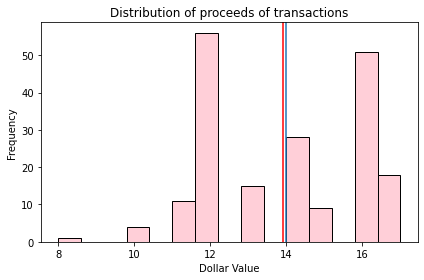

In [5]:
#creating a histogram for meduc
sns.histplot(data  = df,
             x     ='meduc',
             bins  = 15,
             kde   = False,
             color = 'pink')


# this adds a title
plt.title(label = "Distribution of proceeds of transactions")


# this adds an x-label
plt.xlabel(xlabel = 'Dollar Value')


# this adds a y-label
plt.ylabel(ylabel = 'Frequency')

#adding the mean and the median 
plt.axvline(x=df['meduc'].mean(),
           color = 'red')
plt.axvline(x=df['meduc'].median())


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()


In [6]:
# developing a loop to automatically flag missing values for meduc, feduc and npvis
for col in df:

    if df[col].isnull().astype(int).sum() > 0:
        df['m_'+col] = df[col].isnull().astype(int)

print(df.columns)

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc'],
      dtype='object')


In [7]:
#impute missing values with the mode 
df["meduc"].fillna(value=df["meduc"].mode()[0], inplace =True)
df["feduc"].fillna(value=df["feduc"].mode()[0], inplace = True)
df["npvis"].fillna(value=df["npvis"].mode()[0], inplace =True)

print(df.isnull().sum(axis = 0))

mage       0
meduc      0
monpre     0
npvis      0
fage       0
feduc      0
omaps      0
fmaps      0
cigs       0
drink      0
male       0
mwhte      0
mblck      0
moth       0
fwhte      0
fblck      0
foth       0
bwght      0
m_meduc    0
m_npvis    0
m_feduc    0
dtype: int64


In [8]:
#creating new potentially helpful columns for the df

df["cigs_drink_mult"]=df["cigs"]*df["drink"]

df["parents_age_mult"]=df["mage"]*df["fage"]

df["parents_age_ad"]=df["mage"]+df["fage"]

df["parents_black_ad"]=df["mblck"]+df["fblck"]

df["parents_white_ad"]=df["mwhte"]+df["fwhte"]

df["black_cigs_mult"]=df["parents_black_ad"]*df["cigs"]

df["age_cigs_mult"]=df["parents_age_mult"]*df["cigs"]

#log transformation of mothers age and saving it to the dataset
df['log_mage'] = np.log(df['mage'])

# creating a (Pearson) correlation matrix to understand the correlation with the y variable, birthweight
df_corr = df.corr(method="pearson").round(2)
#print the corrleation matrix 
print(df_corr.loc['bwght'].sort_values(ascending = False))

#printing all columns 
print(df.columns)

bwght               1.00
omaps               0.25
fmaps               0.25
mblck               0.13
feduc               0.13
parents_black_ad    0.13
fblck               0.12
male                0.11
meduc               0.11
m_npvis             0.06
npvis               0.06
m_feduc            -0.00
moth               -0.02
fwhte              -0.04
monpre             -0.05
parents_white_ad   -0.08
foth               -0.08
mwhte              -0.11
black_cigs_mult    -0.11
m_meduc            -0.13
fage               -0.40
log_mage           -0.42
mage               -0.46
parents_age_ad     -0.49
parents_age_mult   -0.50
cigs               -0.57
age_cigs_mult      -0.69
drink              -0.74
cigs_drink_mult    -0.80
Name: bwght, dtype: float64
Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'cigs_drink_mult',
       'parents_a

In [9]:
# declaring set of x-variables
#TAKE OUT BWGHT, omaps and fmaps
full_variables = ['meduc', 'fage',
       'cigs', 'drink', 'male']


x_variables = ['log_mage', 'meduc','feduc',
       'cigs', 'drink', 'male', 'moth', 'fblck',
       'foth', 'm_meduc', 'm_npvis', 'm_feduc', 'cigs_drink_mult',
       'parents_age_mult','black_cigs_mult', 'age_cigs_mult']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_mage +
meduc +
feduc +
cigs +
drink +
male +
moth +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +
cigs_drink_mult +
parents_age_mult +
black_cigs_mult +
age_cigs_mult +


In [10]:
# preparing the target variable
df_target = df.loc[ : , 'bwght']

# preparing explanatory variable data
df_data   = df.drop(['bwght'], axis = 1)

In [11]:
df_data_FULL = df_data.loc[:, full_variables]

df_data_ols = df_data.loc[:, x_variables]

In [12]:
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            df_data_FULL,     # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            df_data_ols,         # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [13]:
# merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([x_train_FULL, y_train_FULL], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ meduc+
                                        fage+
                                        cigs+
                                        drink+
                                        male""",
                                data = df_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     62.44
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.70e-34
Time:                        20:42:25   Log-Likelihood:                -1078.8
No. Observations:                 147   AIC:                             2170.
Df Residuals:                     141   BIC:                             2188.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4391.6145    269.946     16.268      0.0

In [14]:
# merging X_train and y_train so that they can be used in statsmodels
df_train_ols = pd.concat([x_train_OLS, y_train_OLS], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula = """bwght ~ log_mage +
                                        meduc +
                                        feduc +
                                        cigs +
                                        drink +
                                        male +
                                        moth +
                                        fblck +
                                        foth +
                                        m_meduc +
                                        m_npvis +
                                        m_feduc +
                                        cigs_drink_mult +
                                        parents_age_mult +
                                        black_cigs_mult +
                                        age_cigs_mult
                                 """,
                                data = df_train_ols)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())


#taken out  m_meduc + m_npvis + m_feduc + black_cigs_mult + npvis +  m_feduc + age_cigs_mult+  monpre +   feduc + parents_black_ad +

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     25.85
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           9.29e-33
Time:                        20:42:25   Log-Likelihood:                -1059.5
No. Observations:                 147   AIC:                             2153.
Df Residuals:                     130   BIC:                             2204.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4010.1555    800.346  

In [15]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
#doesnt not know the y values just applies the found coefficients to the new data 
lr_pred = lr_fit.predict(x_test_FULL)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_FULL, y_train_FULL).round(4))# using R-square
print('OLS Testing Score  :',  lr.score(x_test_FULL, y_test_FULL).round(4)) # using R-square


lr_train_score= lr.score(x_train_FULL, y_train_FULL).round(4)
lr_test_score= lr.score(x_test_FULL, y_test_FULL).round(4)

# displaying and saving the gap between training and testing
#checks stability of the model should be below 0.05 - 5% 
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


#these scores are R^2

OLS Training Score : 0.6889
OLS Testing Score  : 0.69
OLS Train-Test Gap : 0.0011


In [16]:
# zipping each feature name to its coefficient
lr_model_values = zip(df_data[full_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4391.61)
('meduc', 35.84)
('fage', -13.39)
('cigs', -39.05)
('drink', -114.94)
('male', 68.98)


In [17]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
#doesnt not know the y values just applies the found coefficients to the new data 
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))# using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square


lr_train_score= lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score= lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
#checks stability of the model should be below 0.05 - 5% 
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


#these scores are R^2

OLS Training Score : 0.7608
OLS Testing Score  : 0.5498
OLS Train-Test Gap : 0.211


In [18]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square



# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6876
Lasso Testing Score  : 0.706
Lasso Train-Test Gap : 0.0184


In [19]:
# zipping each feature name to its coefficient
lasso_model_values = zip(df_data[full_variables].columns,
                      lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4441.72)
('meduc', 28.97)
('fage', -12.56)
('cigs', -37.47)
('drink', -113.79)
('male', 46.49)


In [20]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6862
Testing Score : 0.7177
ARD Train-Test Gap : 0.0315


In [21]:
# zipping each feature name to its coefficient
ard_model_values = zip(df_data[full_variables].columns,
                      ard_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4524.2)
('meduc', 27.12)
('fage', -12.8)
('cigs', -38.43)
('drink', -117.01)
('male', 7.11)


In [22]:
# comparing results
#add coeficients for the final table 
#lable Final model as dynamic string!! 

print(f"""
Model      Train Score      Test Score       Train-Test Gap
-----      -----------      ----------       --------------
OLS         {lr_train_score.round(2)}               {lr_test_score.round(2)}              {lr_test_gap.round(2)}
Lasso       {lasso_train_score.round(2)}               {lasso_test_score.round(2)}              {lasso_test_gap.round(2)}
ARD*        {ard_train_score.round(2)}               {ard_test_score.round(2)}              {ard_test_gap.round(2)}

*Final Model

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel("linear_model_performance.xlsx",
                           index = False)


Model      Train Score      Test Score       Train-Test Gap
-----      -----------      ----------       --------------
OLS         0.76               0.55              0.21
Lasso       0.69               0.71              0.02
ARD*        0.69               0.72              0.03

*Final Model




The Final Model is ARD with a Test Score of 72% and a Train-Test Gap of 3%

Trying whether standardized KNN is also an option. 
Realizing it is not. 

In [23]:
df_data_for_scaling   =df_data_FULL.copy()


# INSTANTIATING a StandardScaler() object
#makes everyhing be on the same variance sacle 
#mean zero
#St dev one 
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(df_data_for_scaling)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(df_data_for_scaling)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4
count,196.00,196.00,196.00,196.00,196.00
mean,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.87,-1.82,-1.80,-1.80,-1.11
25%,-0.92,-0.51,-0.81,-0.47,-1.11
50%,0.06,-0.14,0.01,-0.13,0.90
75%,1.03,0.41,0.71,0.62,0.90
max,1.52,3.76,2.31,2.87,0.90


In [24]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = df_data_FULL.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(df_data_FULL)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
meduc     4.195413
fage     80.277671
cigs     37.035714
drink     8.964077
male      0.247397
dtype: float64


Dataset AFTER Scaling
----------------------
meduc    1.0
fage     1.0
cigs     1.0
drink    1.0
male     1.0
dtype: float64



In [25]:
# FULL X-dataset (normal Y)
x_train_sc_FULL, x_test_sc_FULL, y_train_sc_FULL, y_test_sc_FULL = train_test_split(
            x_scaled_df,     # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [26]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 3)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train_sc_FULL, y_train_sc_FULL)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test_sc_FULL)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_sc_FULL, y_train_sc_FULL).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_sc_FULL, y_test_sc_FULL).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_sc_FULL, y_train_sc_FULL).round(4)
knn_reg_score_test  = knn_reg.score(x_test_sc_FULL, y_test_sc_FULL).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.7708
KNN Testing Score : 0.4568
KNN Train-Test Gap: 0.314
